# Examining House Prices in London.

In this data visualization project I will examine how London house prices have changed compared to England house prices over the years and what is the current market situation. I will also explore a few of those factors what could influence the market. I am going to use explanotary data analysis to discover trends in the data with the goal of understanding the economic analysis of London house prices, which have been carried out by Joel Marsden in 2015 (https://www.london.gov.uk/sites/default/files/house-prices-in-london.pdf) concludig that London house prices are ofter overvalued, but still contiously grows and to answer the following research questions:
 - How London house prices have changed between 1995 and 2020 compared to England?
 - What is the current market situation in different London boroughs?
 - How the volume of sales affect the house prices?
 


## 1. Data Preparation

### 1.1 Importing Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import geopandas as gpd

### 1.2 Datasets

#### UK House Price Index

For this project my main dataset will be the UK House Price Index which I have downlaoded from the London Data Store (https://data.london.gov.uk/dataset/uk-house-price-index) and has been collected by Land Registry. The UK HPI uses sales data collected on residential housing transactions, whether for cash or with a mortgage. This dataset includes the monthly house prices between 01/1995 and 09/2020 in all 33 London boroughs and England. To conduct this research I was pecifically  looking for the the most reliable and largest dataset about UK house prices in London and this seemed to be the best dataset for this project. 


#### *Statistical GIS Boundary Files for London

To make choropleth maps I had to use this extra dataset. These datasets covered all the necessary data to draw London maps using geopandas. (https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london) 


Importing Datasets

In [140]:
# Loading Average House Prices from The Excel File, We load all the different borough + London average + England Average
# This dataset is quite clean already, we will use the dates as index and we will not use the 2nd row as it is empty.
df_hp = pd.read_excel('datasets/UK_House_price_index.xlsx',sheet_name='Average price', usecols='A:AH,AS,AW', skiprows=[1])

# Giving a name for the dates and renaming LONDON column to keep it consequent.
df_hp.columns.values[0] = 'date'
df_hp.rename(columns={'LONDON':'London'}, inplace = True)

# Create a datetime series by parsing the dates.
df_hp['date'] = pd.to_datetime(df_hp['date'], format='%d%m%Y')

# Assign the date column to the index, creating a DatetimeIndex.
df_hp.set_index('date', inplace=True)

# Convert the DatetimeIndex to a PeriodIndex of month frequency.
df_hp = df_hp.to_period('m')

df_hp.head(3)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,London,England
date,,,,,,,,,,,,,,,,,,,,,
1995-01,91448.98487,50460.22660,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772,74435.76052,53202.77128
1995-02,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,72141.62610,111103.0394,64799.06480,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096,72777.93709,53096.15490
1995-03,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417,73896.84204,53201.28430


In [141]:
df_hp.describe()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,London,England
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,3.090000e+02,309.000000,309.000000
mean,434962.217805,163475.617041,310665.440113,193501.414171,275885.228700,258755.803735,477184.719616,213567.874275,279859.842076,227998.368088,...,239866.417606,390286.285106,281023.238775,221346.425800,262927.335218,226162.586748,349045.014870,5.546938e+05,271093.265359,155614.030763
std,248226.046198,78611.892564,143884.006020,87720.631938,136811.409461,115076.069132,245542.800109,95963.126612,130956.331389,104173.293086,...,109804.834841,182107.651266,148769.203735,98005.213617,126580.570332,123403.980127,174643.535923,3.072592e+05,131997.050604,63512.238977
min,77101.208040,50460.226600,90107.234710,63722.700550,71306.566980,81124.412270,115418.839600,68006.007350,79272.346180,70630.779550,...,72141.626100,106875.000000,60885.984830,69290.690040,59865.189950,60252.122460,86518.059450,1.314683e+05,72777.937090,52333.225120
25%,242434.957000,86732.496610,181194.255600,113776.317800,155900.403800,160098.087400,273059.335000,129021.610700,168654.825100,134910.238300,...,139840.349200,243683.747600,165831.629800,135751.013400,163245.776800,116171.266500,207819.677500,2.925149e+05,158760.177100,89980.133540
50%,393361.415800,164000.407000,309910.100500,196623.085400,268663.190700,258655.338400,451643.047700,213550.955700,277405.596500,228464.972300,...,242858.330300,375899.905100,264173.180300,222170.195700,264492.338500,214784.103100,347565.013700,5.204358e+05,266836.526800,174161.201500
75%,665262.157900,196257.365600,414854.682700,232024.241200,379175.290100,327862.639900,728941.979000,265666.871800,384904.479800,281240.720700,...,291686.776600,554545.760900,401255.758700,277918.073200,376185.402200,295647.103800,529299.892800,8.903202e+05,375336.803100,194763.901300
max,939911.647300,306390.264300,549401.174400,348109.949300,522324.058400,449292.941540,890288.405600,381139.237600,506143.138500,404441.662400,...,432138.296500,700186.641300,535685.068800,387410.107910,476814.412700,461726.973100,633826.050000,1.117408e+06,496484.651900,261795.298100


In [142]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 309 entries, 1995-01 to 2020-09
Freq: M
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City of London        309 non-null    float64
 1   Barking & Dagenham    309 non-null    float64
 2   Barnet                309 non-null    float64
 3   Bexley                309 non-null    float64
 4   Brent                 309 non-null    float64
 5   Bromley               309 non-null    float64
 6   Camden                309 non-null    float64
 7   Croydon               309 non-null    float64
 8   Ealing                309 non-null    float64
 9   Enfield               309 non-null    float64
 10  Greenwich             309 non-null    float64
 11  Hackney               309 non-null    float64
 12  Hammersmith & Fulham  309 non-null    float64
 13  Haringey              309 non-null    float64
 14  Harrow                309 non-null    float64
 15  Have

> We have 35 Columns each having 309 values which represents the avarage price in the area at the given dates. Luckily our dataset is complete and we have no null values.

## 2. Analysis

### 2.1. Comparing London average house prices with England average house prices over the years.

#### To start with I will plot the average of London house prices with England to see difference.

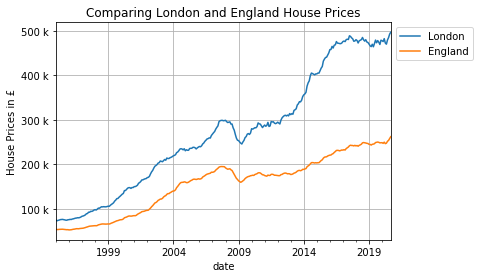

In [143]:
# I select only the England and London Column to compare only these two.
df_hp_london_england = df_hp[['London','England']]
# Plotting the dataframe.
ax = df_hp_london_england.plot(grid=True)
# Setting y axis format
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Comparing London and England House Prices')
ax.set_ylabel('House Prices in £')
plt.show()

> From this graph we can see that England and London has followed the same trends as house prices have increased but the average of London house prices have been always significantly more expensive than the England average. We can also see the prices have almost always increased time to time but between 2007 and 2009 the prices have dropped. This is due the Great Recession which was a period when the national economies globally marked a general decline. We can also see another decrease in London around 2016 and 2017 this is when the Brexit was voted but opposed to London, the England average has continued its increase.

#### Now I will demonstrate how the difference between the average of London and the average of England has changed over the years.

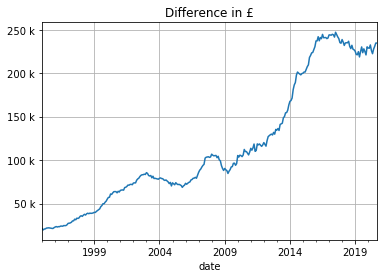

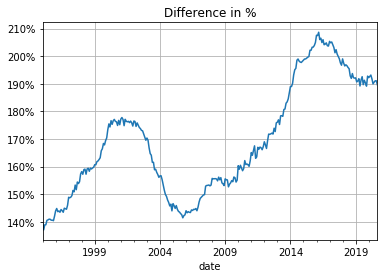

In [144]:
# Creating a dataframe with the price difference
df_hp_difference = df_hp['London'] - df_hp['England']
ax1 = df_hp_difference.plot(grid=True)
ax1.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))
ax1.set_title('Difference in £')
plt.show()

# Creating a dataframe with percentage different.
df_hp_percentage = df_hp['London'] / df_hp['England']
ax2 = df_hp_percentage.plot(grid=True)
ax2.set_title('Difference in %')
# Setting yaxis labels to percentage
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
plt.show()

> From the 1st graph we can see that the higher the prices went up the bigger the gap was between England and London house prices, however if we have a look at the second graph we can tell that we can see that in percentage this was not the case. Around 2001-2002 England house prices has started getting significantly closer to London prices. This means while the the price difference was still increasing the difference in % has decreased. In 2002 an average London house price was 1.75 times as much as an average England house in 2006 this has decreased to 1.42, which is a large difference. In 2006 the difference has started rising sharply again. In 2016 an average London house cost twice as much as an England house. From this diagram we can easily tell that Brexit referendum had a much larger impact on London house prices. 

#### In my next diagram I will compare the London borough where the mean price was the lowest over the years with England house prices.

In [145]:
#Creating a dataframe without England and London columns.
df_hp_london = df_hp.drop(labels=['England', 'London'],axis=1)

# Calculating the mean values for each Borough
london_mean = df_hp_london.mean()

# Returning the name of the borough where the mean was smallest.
lowest = london_mean[london_mean==london_mean.min()].index[0]

# Now we have the lowest value and England in a dateframe
df_hp[[lowest,'England']].head(3)

,Barking & Dagenham,England
date,,
1995-01,50460.22660,53202.77128
1995-02,51085.77983,53096.15490
1995-03,51268.96956,53201.28430


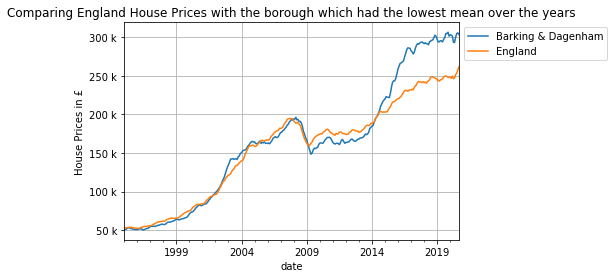

In [146]:
# Selecting the lowest mean and England
# Plotting the dataframe.
ax = df_hp[[lowest,'England']].plot(grid=True)
# Setting y axis format
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Comparing England House Prices with the borough which had the lowest mean over the years')
ax.set_ylabel('House Prices in £')
plt.show()

 > It is an interesting comparisation where we can see that even the borough with the lowest mean in London over the years has very similar price history as England average but since 2014 the difference has grown considerably towards Barking & Dagenham and nowadays prices are 25% higher on average than in England.

### 2.2. Examining Current Market Situation in London

In [147]:
# Creating a dataframe for our test available date and in our dataset, which should be September 2020 in our dataset
df_latest = pd.DataFrame(df_hp.loc[df_hp.index.max()])
# Droping England, and London to leave only London Boroughs
df_latest.drop(labels=['England','London'], inplace=True)
# Renaming index column to Borough
df_latest.index.name = 'borough'
# Renaming 2020-09 column to price
df_latest.columns = ['price']

df_latest.head(5)

,price
borough,
City of London,793046.3438
Barking & Dagenham,303389.1591
Barnet,535339.6976
Bexley,343469.5714
Brent,522324.0584


In [148]:
# Creating a dataset for the 5 cheapest boroughs
df_cheapest = df_latest['price'].nsmallest(5).to_frame()
df_cheapest

,price
borough,
Barking & Dagenham,303389.1591
Bexley,343469.5714
Havering,377664.5601
Croydon,381139.2376
Newham,382662.3192


#### Plotting the 5 cheapest borough for housing in London.

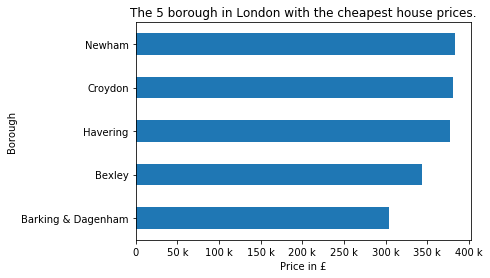

In [149]:
ax = df_cheapest.plot(kind='barh',legend = False)
ax.set_title('The 5 borough in London with the cheapest house prices.')
ax.set_ylabel('Borough')
ax.set_xlabel('Price in £')
ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))
plt.show()

> This Bar Chart Clearly Shows that the borough where the house prices are the lowest is Barking & Dagenham according to our last available data. This means it not just had the lowest average price over the years but it offers the cheapest housing prices on average currently. Meaning there are no areas in London which would have lower prices than the England average.

#### Plotting the 5  borough which has the highest housing prices.

In [150]:
df_expensive = df_latest['price'].nlargest(5).to_frame()
df_expensive

,price
borough,
Kensington & Chelsea,1.346456e+06
Westminster,9.250039e+05
Camden,8.131545e+05
City of London,7.930463e+05
Hammersmith & Fulham,7.795704e+05


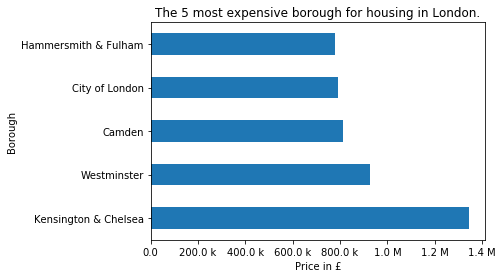

In [151]:
ax = df_expensive.plot(kind='barh',legend = False)
ax.set_title('The 5 most expensive borough for housing in London.')
ax.set_ylabel('Borough')
ax.set_xlabel('Price in £')
ax.xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
plt.show()

> This bar chart shows that Kensington & Chealsea average house prices are much more expensive than anywhere else in London. With an average of around £1.35.

#### Now I will plot a choropleth map for London house prices.
For this I need to load another dataset

In [152]:
# loading dataset containing necessary data for maps
# This data is already cleaned and ready to use.
fp = 'datasets/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp)

# Setting name as Index
map_df.set_index('NAME', inplace=True)

# Renaming some of the boroughs before melting them together.
map_df.rename(index={'Hammersmith and Fulham':'Hammersmith & Fulham', 'Kensington and Chelsea': 'Kensington & Chelsea', 'Barking and Dagenham':'Barking & Dagenham'},errors='raise',inplace=True)

map_df.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
NAME,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


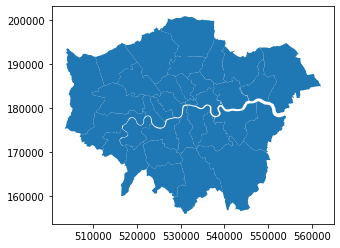

In [153]:
#plotting London map.
map_df.plot()

In [154]:
# Merge the geodataframe with the dateframe containing last available data.
df_map_hp = map_df.join(df_latest)
df_map_hp.head(5)


,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,price
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",502407.2465
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",381139.2376
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",445218.7958
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",408631.7179
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",506143.1385


Text(0.5, 1, 'London House Prices in September 2020')

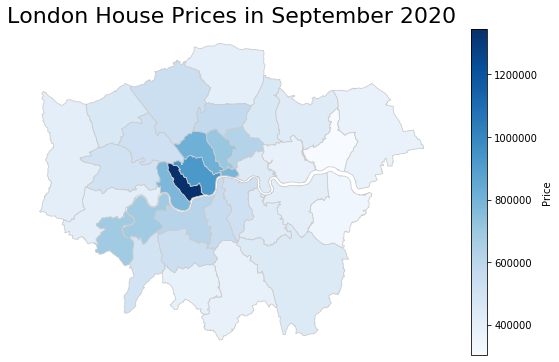

In [155]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
df_map_hp.plot(column='price', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds = {'label':'Price'})
# remove the axis
ax.axis('off')
# add a title
ax.set_title('London House Prices in September 2020', fontdict={'fontsize': '22', 'fontweight' : '3'})

# To learn how to create this diagram I have used this website: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

> This is chorolopleth map perfectly shows the closer we get to Central London the higher the house prices are, while we can also see that cheapest area is around East London. Interesting to see that there are some parts of West London which are quite far from Central but the prices are still quite high.

### 2.3 How the volume of sales affect the house prices

In [160]:
# Loading the sales volume sheet from the Excel file
df_sv = pd.read_excel('datasets/UK_House_price_index.xlsx',sheet_name='Sales Volume', usecols='A,AS', skiprows=[1])
df_sv.columns.values[0] = 'date'
df_sv.rename(columns={'LONDON':'London'},inplace=True)
df_sv.head(3)



,date,London
0,1995-01-01,7506
1,1995-02-01,6873
2,1995-03-01,9639


In [161]:
df_sv_sum = df_sv

In [162]:
# Create a datetime series by parsing the dates.
df_sv_sum['date'] = pd.to_datetime(df_sv_sum['date'], format='%Y')

In [163]:
# Groupby the year of the and take the sum of sales of that year
df_sv_sum = df_sv_sum.groupby(df_sv_sum['date'].dt.year).sum()
# Renaming London to sales
df_sv_sum.rename(columns={'London':"sales"},inplace=True)
df_sv_sum.head(3)

,sales
date,
1995,106850
1996,132953
1997,154343


In [164]:
# For simplicity I will reload my original dataset only with London data.
# Loading Average House Prices from The Excel File, We load all the different borough + London average + England Average
# This dataset is quite clean already, we will use the dates as index and we will not use the 2nd row as it is empty.
df_hp = pd.read_excel('datasets/UK_House_price_index.xlsx',sheet_name='Average price', usecols='A:AH,AS', skiprows=[1])

df_hp.columns.values[0] = 'date'
df_hp.rename(columns={'LONDON':'London'},inplace=True)

# Create a datetime series by parsing the dates.
df_hp['date'] = pd.to_datetime(df_london['date'], format='%Y')
df_london=df_hp[['date','London']]

# Groupby the year of the and take the mean of sales of that year
df_london_mean = df_london.groupby(df_london['date'].dt.year).mean()
# Renaming London to sales
df_london_mean.rename(columns={'London':"price"},inplace =True)
df_london_mean.head(3)

,price
date,
1995,74721.326875
1996,78166.224347
1997,89943.920103


In [165]:
# Now We Can Simply merge the two dataframes
df_merged = pd.merge(df_sv_sum, df_london_mean, on='date')
# We drop 2020 as the year has not finished yet.
df_merged.drop(2020, axis=0,inplace=True)
# Check the last 3 row
df_merged.tail(3)

,sales,price
date,,
2017,96040,480247.169883
2018,89797,477854.814982
2019,82860,471310.730333


Text(0.5, 0, 'Year')

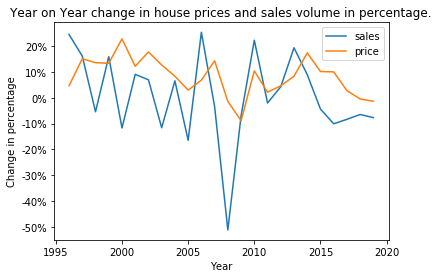

In [166]:
ax = df_merged.pct_change().plot()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
ax.set_title('Year on Year change in house prices and sales volume in percentage.')
ax.set_ylabel('Change in percentage')
ax.set_xlabel('Year')

> With this diagram I wanted to demonstrate how the year on year change looks like on sales volume and price in percentage. This diagram shows that the prices often followed the changes in sales. We can see that orange line is often above the blue line meaning even if the sales volume has not increased that much the prices stil grow more. We can also see that the Great Recession had a much larger impact on sales volume than on the housing prices.

## 3. Concolusion

In conclusion, I had a great understanding from the visualizations that the average London house prices has always been higher than the average England houses and there are no areas in London where this would be different. Now we can see a tendency that prices getting closer to London house prices thic can be due to Brexit and this year maybe also due to Covid-19 as people start working from home and the large offices in London are not in use.

I have also explored the current market situation and could easily identify the most expensive and cheapest areas in London. I also explored some new information with my last visualization where I have discovered that increasing volume of sales results higher prices, but the house prices usually grow more significantly than the volume of sales.